# Finding the optimal neighborhoods in San Diego to open Indian Cuisine restaurants

## Acquiring Data

### First we install the required libraries for this project

In [1]:
!pip install beautifulsoup4

In [2]:
!pip install lxml

### Importing all the required libraries

In [48]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import folium

#### Using request to call the url and parse using Beautiful soup and lxml parser

In [49]:
website_url = requests.get("http://seattlearea.com/zip-codes/").text

soup = BeautifulSoup(website_url,'lxml')


In [53]:
My_data = soup.find('div',{'class':'entry-content'})
cnames = []
for th in My_data.find_all('div'):
    cnames.append(th.string)
cnames

['Neighborhood Zipcodes',
 '» 98003 - Federal Way',
 '» 98005 - Bellevue',
 '» 98033 - Kirkland',
 '» 98037 - Lynnwood',
 '» 98040 - Mercer Island',
 '» 98052 - Redmond',
 '» 98055 - Renton',
 '» 98101 - Seattle',
 '» 98101 - Downtown',
 '» 98102 - Capital Hill',
 '» 98103 - Greenwood',
 '» 98103 - Freemont',
 '» 98103 - Greenlake',
 '» 98104 - International District',
 '» 98104 - Pioneer Square',
 '» 98105 - University District',
 '» 98105 - Laurelhurst',
 '» 98107 - Ballard',
 '» 98109 - South Lake Union',
 '» 98109 - Queen Anne',
 '» 98110 - Bainbridge Island',
 '» 98110 - Madrona',
 '» 98116 - West Seattle',
 '» 98116 - Alki Beach',
 '» 98118 - Columbia City',
 '» 98121 - Belltown',
 '» 98125 - Northgate',
 '» 98144 - Mount Baker',
 '» 98199 - Magnolia']

In [54]:
cnames=cnames[1:]

In [55]:
postal_codes = []
for cname in cnames:
    postal_codes.append(cname[cname.find('»') + 1: cname.find('-')])
postal_codes

[' 98003 ',
 ' 98005 ',
 ' 98033 ',
 ' 98037 ',
 ' 98040 ',
 ' 98052 ',
 ' 98055 ',
 ' 98101 ',
 ' 98101 ',
 ' 98102 ',
 ' 98103 ',
 ' 98103 ',
 ' 98103 ',
 ' 98104 ',
 ' 98104 ',
 ' 98105 ',
 ' 98105 ',
 ' 98107 ',
 ' 98109 ',
 ' 98109 ',
 ' 98110 ',
 ' 98110 ',
 ' 98116 ',
 ' 98116 ',
 ' 98118 ',
 ' 98121 ',
 ' 98125 ',
 ' 98144 ',
 ' 98199 ']

In [56]:
neighborhoods = []
for cname in cnames:
    neighborhoods.append(cname.split('-')[1])
neighborhoods

[' Federal Way',
 ' Bellevue',
 ' Kirkland',
 ' Lynnwood',
 ' Mercer Island',
 ' Redmond',
 ' Renton',
 ' Seattle',
 ' Downtown',
 ' Capital Hill',
 ' Greenwood',
 ' Freemont',
 ' Greenlake',
 ' International District',
 ' Pioneer Square',
 ' University District',
 ' Laurelhurst',
 ' Ballard',
 ' South Lake Union',
 ' Queen Anne',
 ' Bainbridge Island',
 ' Madrona',
 ' West Seattle',
 ' Alki Beach',
 ' Columbia City',
 ' Belltown',
 ' Northgate',
 ' Mount Baker',
 ' Magnolia']

In [57]:
df = pd.DataFrame()
df['PostalCode']=postal_codes
df['Neighborhood']=neighborhoods
df=df.drop([11])

In [58]:
df['Neighborhood'] = df['Neighborhood'].replace('\n', '', regex=True)
df['PostalCode'] = df['PostalCode'].replace('\n', '', regex=True)
df.head()

,PostalCode,Neighborhood
0,98003,Federal Way
1,98005,Bellevue
2,98033,Kirkland
3,98037,Lynnwood
4,98040,Mercer Island


In [59]:
lat_n=[]
lon_n=[]
for index,row in df.iterrows():
    address=('"'+row['Neighborhood']+','+' '+'Seattle'+'"')
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    lat_n.append(location.latitude)
    lon_n.append(location.longitude)
lat_n
   

[47.2957805,
 47.6270727,
 47.6545157,
 47.8103747,
 47.5683574,
 47.70350655,
 47.5107316,
 47.6028956,
 47.6049492,
 14.6696779,
 47.6909806,
 47.6760033,
 47.6028956,
 47.60213935,
 47.6612984,
 47.6634317,
 47.6765073,
 47.6231611,
 47.6394805,
 47.6550969,
 47.6127915,
 47.5709315,
 47.58199435,
 47.5579124,
 47.6132311,
 47.7131534,
 47.5785522,
 47.6489369]

In [60]:
for index,row in df.iterrows():
    address=('"'+row['Neighborhood']+','+' '+'Seattle'+'"')
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    print(location)

USPS Seattle Network Distribution Center, Federal Way, King County, Washington, USA
Bellevue Place, Capitol Hill, Seattle, King County, Washington, USA
Consulate General of Sweden, Seattle, 5350, Carillon Point, Juanita, Kirkland, King County, Washington, 98033, USA
Seattle Heights, Snohomish County, Washington, 98043, USA
Seattle Public Utilities Water Redistribution Center, 89th Avenue Southeast, Mercer Island, King County, Washington, 98040, USA
Armenian Apostolic Church of Seattle, Woodinville-Redmond Road Northeast, Redmond, King County, Washington, 98052, USA
Renton Avenue South, Rainier Beach, Rainier Valley, Seattle, King County, Washington, 98178, USA
Seattle, Colman Dock, West Edge, Belltown, Seattle, King County, Washington, 98174, USA
Downtown Seattle Transit Tunnel, Marion Street, West Edge, First Hill, Seattle, King County, Washington, 98164, USA
Seattle, Vista Real Classica, Batasan Hills, 2nd District, Quezon City, Metro Manila, 1808, Philippines
Greenwood, Seattle, Kin

In [61]:
df['Latitude']=lat_n
df['Longitude']=lon_n
df

,PostalCode,Neighborhood,Latitude,Longitude
0,98003,Federal Way,47.295780,-122.325464
1,98005,Bellevue,47.627073,-122.327626
2,98033,Kirkland,47.654516,-122.205614
3,98037,Lynnwood,47.810375,-122.324020
4,98040,Mercer Island,47.568357,-122.220895
5,98052,Redmond,47.703507,-122.132372
6,98055,Renton,47.510732,-122.260317
7,98101,Seattle,47.602896,-122.339841
8,98101,Downtown,47.604949,-122.333274
9,98102,Capital Hill,14.669678,121.098831


In [62]:
address = " Seattle, Seattle"

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle are 47.6028956, -122.3398408.


In [63]:
# create map of seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

In [30]:
CLIENT_ID = 'ZPBNVL5EV1OH0NKPOPPZ015F5ONH1N5MFTNWYGTWDK4TJXWL' # your Foursquare ID
CLIENT_SECRET = 'BF4DXZGHCM2JQZ42O5KHLAYDOOB5AE1TJ1X2XEDHZLKYNCJH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT=100
radius=500

Your credentails:
CLIENT_ID: ZPBNVL5EV1OH0NKPOPPZ015F5ONH1N5MFTNWYGTWDK4TJXWL
CLIENT_SECRET:BF4DXZGHCM2JQZ42O5KHLAYDOOB5AE1TJ1X2XEDHZLKYNCJH


In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
seattle_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

 Federal Way
 Bellevue
 Kirkland
 Lynnwood
 Mercer Island
 Redmond
 Renton
 Seattle
 Downtown
 Capital Hill
 Greenwood
 Greenlake
 International District
 Pioneer Square
 University District
 Laurelhurst
 Ballard
 South Lake Union
 Queen Anne
 Bainbridge Island
 Madrona
 West Seattle
 Alki Beach
 Columbia City
 Belltown
 Northgate
 Mount Baker
 Magnolia


In [33]:
seattle_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Federal Way,47.295780,-122.325464,CrossFit Federal Way,47.298880,-122.323581,Gym
1,Federal Way,47.295780,-122.325464,Gymnastics Unlimited,47.296597,-122.319283,Gymnastics Gym
2,Bellevue,47.627073,-122.327626,Barjot,47.625701,-122.326748,Café
3,Bellevue,47.627073,-122.327626,Top Pot Doughnuts,47.624630,-122.325470,Donut Shop
4,Bellevue,47.627073,-122.327626,Harry's Fine Foods,47.624402,-122.326771,Restaurant
5,Bellevue,47.627073,-122.327626,Sol Liquor Lounge,47.624605,-122.325434,Cocktail Bar
6,Bellevue,47.627073,-122.327626,Single Shot,47.624688,-122.325431,American Restaurant
7,Bellevue,47.627073,-122.327626,The Lookout,47.626724,-122.326752,Bar
8,Bellevue,47.627073,-122.327626,Silver Cloud Inn Seattle - Lake Union,47.629610,-122.329098,Hotel
9,Bellevue,47.627073,-122.327626,Pro Sports Club,47.623538,-122.329503,Gym


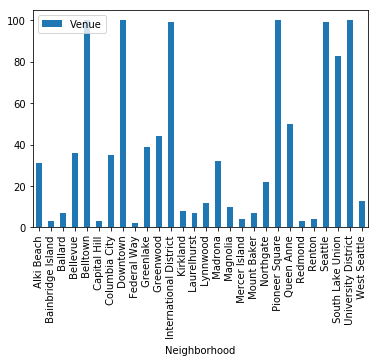

In [80]:
df2.plot.bar(x='Neighborhood', y='Venue')

In [ ]:
df2=seattle_venues.groupby('Neighborhood').count()[['Venue']]

In [79]:
df2.index.name = 'Neighborhood'
df2.reset_index(inplace=True)

In [34]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 203 uniques categories.


In [35]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()

,Yoga Studio,ATM,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
seattle_onehot.shape

(1053, 203)

In [38]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped

,Neighborhood,Yoga Studio,ATM,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Alki Beach,0.000000,0.00,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.032258,...,0.000000,0.032258,0.032258,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.00
1,Bainbridge Island,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.00
2,Ballard,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.00
3,Bellevue,0.027778,0.00,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.00
4,Belltown,0.000000,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.01,0.01000,0.01,0.00
5,Capital Hill,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.00
6,Columbia City,0.000000,0.00,0.057143,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.057143,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.00
7,Downtown,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.01000,0.00,0.01
8,Federal Way,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.00
9,Greenlake,0.051282,0.00,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.00


In [39]:
num_top_venues = 5

for hood in seattle_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = seattle_grouped[seattle_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Alki Beach----
            venue  freq
0  Ice Cream Shop  0.13
1           Beach  0.10
2     Coffee Shop  0.06
3      Food Truck  0.06
4            Park  0.06


---- Bainbridge Island----
                       venue  freq
0                Music Venue  0.33
1  Latin American Restaurant  0.33
2                      Beach  0.33
3                Yoga Studio  0.00
4                   Pharmacy  0.00


---- Ballard----
               venue  freq
0                Bar  0.14
1      Jewelry Store  0.14
2  French Restaurant  0.14
3               Park  0.14
4        Video Store  0.14


---- Bellevue----
                venue  freq
0                 Bar  0.11
1               Hotel  0.08
2  Seafood Restaurant  0.08
3          Restaurant  0.06
4         Coffee Shop  0.06


---- Belltown----
                     venue  freq
0                      Bar  0.08
1                   Bakery  0.06
2              Coffee Shop  0.05
3  New American Restaurant  0.04
4         Sushi Restaurant  0.04


---- Cap

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alki Beach,Ice Cream Shop,Beach,Mexican Restaurant,Park,Food Truck,Thai Restaurant,Coffee Shop,Seafood Restaurant,Greek Restaurant,Burger Joint
1,Bainbridge Island,Music Venue,Beach,Latin American Restaurant,Ethiopian Restaurant,Frozen Yogurt Shop,French Restaurant,Food Truck,Food & Drink Shop,Food,Fish & Chips Shop
2,Ballard,Bar,Coffee Shop,Jewelry Store,Video Store,Park,French Restaurant,Baseball Field,Women's Store,Food & Drink Shop,Food
3,Bellevue,Bar,Hotel,Seafood Restaurant,Park,Restaurant,Harbor / Marina,Coffee Shop,Yoga Studio,Music Venue,Sushi Restaurant
4,Belltown,Bar,Bakery,Coffee Shop,New American Restaurant,Sushi Restaurant,Pizza Place,Hotel,Italian Restaurant,Lounge,Cocktail Bar


In [42]:
neighborhoods_venues_sorted.shape

(28, 11)

## Clustering the Neighborhoods using K-Means

In [43]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 1, 1, 1, 1, 4, 1], dtype=int32)

In [44]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged.head()

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,98003,Federal Way,47.295780,-122.325464,4,Gymnastics Gym,Gym,Frozen Yogurt Shop,Food Truck,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
1,98005,Bellevue,47.627073,-122.327626,1,Bar,Hotel,Seafood Restaurant,Park,Restaurant,Harbor / Marina,Coffee Shop,Yoga Studio,Music Venue,Sushi Restaurant
2,98033,Kirkland,47.654516,-122.205614,1,Coffee Shop,Wine Bar,Hotel,French Restaurant,American Restaurant,Restaurant,Seafood Restaurant,Harbor / Marina,Falafel Restaurant,Electronics Store
3,98037,Lynnwood,47.810375,-122.324020,1,Korean Restaurant,Mexican Restaurant,Latin American Restaurant,Bar,Donut Shop,BBQ Joint,Pharmacy,Greek Restaurant,Japanese Restaurant,Warehouse Store
4,98040,Mercer Island,47.568357,-122.220895,1,Park,Stadium,Playground,Track Stadium,Eastern European Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [81]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [47]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 1]

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,98005,Bellevue,47.627073,-122.327626,1,Bar,Hotel,Seafood Restaurant,Park,Restaurant,Harbor / Marina,Coffee Shop,Yoga Studio,Music Venue,Sushi Restaurant
2,98033,Kirkland,47.654516,-122.205614,1,Coffee Shop,Wine Bar,Hotel,French Restaurant,American Restaurant,Restaurant,Seafood Restaurant,Harbor / Marina,Falafel Restaurant,Electronics Store
3,98037,Lynnwood,47.810375,-122.324020,1,Korean Restaurant,Mexican Restaurant,Latin American Restaurant,Bar,Donut Shop,BBQ Joint,Pharmacy,Greek Restaurant,Japanese Restaurant,Warehouse Store
4,98040,Mercer Island,47.568357,-122.220895,1,Park,Stadium,Playground,Track Stadium,Eastern European Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
7,98101,Seattle,47.602896,-122.339841,1,Seafood Restaurant,Coffee Shop,Gift Shop,Boat or Ferry,Park,New American Restaurant,Theme Park Ride / Attraction,Pier,Bar,Café
8,98101,Downtown,47.604949,-122.333274,1,Hotel,Coffee Shop,New American Restaurant,Seafood Restaurant,Cocktail Bar,Café,Korean Restaurant,Italian Restaurant,Scenic Lookout,Breakfast Spot
9,98102,Capital Hill,14.669678,121.098831,1,Dim Sum Restaurant,Pizza Place,Basketball Court,Women's Store,Electronics Store,Food Truck,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant
10,98103,Greenwood,47.690981,-122.354877,1,Coffee Shop,Bar,Mexican Restaurant,Pizza Place,Theater,Spa,Mediterranean Restaurant,Cheese Shop,Bridal Shop,Brewery
12,98103,Greenlake,47.676003,-122.322149,1,Coffee Shop,Spa,Vegetarian / Vegan Restaurant,Burger Joint,Yoga Studio,Electronics Store,Frozen Yogurt Shop,Thai Restaurant,Salon / Barbershop,Organic Grocery
13,98104,International District,47.602896,-122.339841,1,Seafood Restaurant,Coffee Shop,Gift Shop,Boat or Ferry,Park,New American Restaurant,Theme Park Ride / Attraction,Pier,Bar,Café
